In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_csv('Doceree-HCP_Train_v2.csv')
df2 = pd.read_csv('Doceree-HCP_Test.csv')

In [3]:
df2.head()

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS
0,115501,Desktop,2,75.189.231.103,0d5041ff-f0b6-4d1a-9ad7-0a29f7d485b4,Fayetteville,28305.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6...,Online Medical Journal,Website,https://www.clinicaladvisor.com/home/features/...,Family Practice|Drainage|Clinical|Dermatology|...
1,115502,Mobile,2,24.101.33.158,c8396dd0-969f-4d99-a40b-b7bb1f516154,Conneaut Lake,16316.0,Mozilla/5.0 (iPhone; CPU iPhone OS 15_6_1 like...,Online Medical Journal,Website,https://www.ophthalmologyadvisor.com/topics/ca...,General|Clinical|Operative|Medicine|Cardiology...
2,115503,Desktop,2,172.118.216.142,3c97a081-6518-43f8-9f26-369759cfb471,Covina,91724.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.psychiatryadvisor.com/author/tori-...,Abortion|Anxiety Disorders|Apnea|False|Trauma|...
3,115504,Desktop,7,71.105.120.171,3e2578c8-f794-41af-a38c-c5cfb3c0f014,Brooklyn,11226.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cureus.com/articles/105482-diverti...,Health|Male|Neurological Surgery|Otolaryngolog...
4,115505,Desktop,2,73.82.211.73,ec2ae7ce-6a8c-4156-98a7-07203e60f483,Marietta,30062.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://www.renalandurologynews.com/home/confe...,chronic kidney disease|pain|nephrology|disease...


In [4]:
df1.head()
print(df1['ID'][len(df1)-1])
print(len(df1))

114937
113937


In [5]:
df1.head()

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,TAXONOMY,IS_HCP
0,1001,Desktop,2,170.173.0.22,6974dcaa-f932-480e-9fb5-c52e20e1393a,Portland,97206.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0
1,1002,Desktop,2,65.216.253.25,c12f3f8f-8fcf-484a-90e1-1ac04db8cdcf,Arlington,22202.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/deci...,Bone Marrow|Radiography|Chronic|Oncology|Psych...,NaN,0.0
2,1003,Desktop,2,66.232.79.22,a698de4b-e200-46dd-b5fb-40402175ae18,New Meadows,83654.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0
3,1004,Desktop,3,137.54.125.246,45967533-75c8-4fbd-a00c-e6ff20447aaa,NaN,229114624.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://globalrph.com/medcalcs/warfarin-mainte...,Dental|Total|Clinical|Pharmacology|Physicians|...,2084P0800X,1.0
4,1005,Mobile,7,174.202.231.99,a17e25be-532d-4cf5-b916-9308c8c3961f,Houston,77008.0,Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_1 like...,Online Medical Journal,Website,https://www.cureus.com/articles/58184-a-review...,Critical Care|Emergency Medicine|General Pract...,NaN,0.0


### Merging the DataFrames

In [6]:
df = pd.concat([df1, df2], axis = 0)
print(len(df))
df.iloc[142429]

142430


ID                                                            143993
DEVICETYPE                                                   Desktop
PLATFORM_ID                                                        2
BIDREQUESTIP                                          107.194.33.149
USERPLATFORMUID                 f9b193b0-82b0-4ac8-b24a-5635401ca934
USERCITY                                                  Wilmington
USERZIPCODE                                                  28412.0
USERAGENT          Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
PLATFORMTYPE                                  Online Medical Journal
CHANNELTYPE                                                  Website
URL                https://www.clinicalpainadvisor.com/regulatory...
KEYWORDS           Medicine|General|Clinical|False|Urology|Total|...
TAXONOMY                                                         NaN
IS_HCP                                                           NaN
Name: 28492, dtype: object

In [7]:
df = df.drop(columns=['USERCITY', 'USERZIPCODE'])
df.shape

(142430, 12)

In [8]:
from sklearn import preprocessing
sti = preprocessing.LabelEncoder()
enc_df = df.apply(sti.fit_transform)
enc_df

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,TAXONOMY,IS_HCP
0,0,0,1,7194,26134,3100,3,0,746,475,207,0
1,1,0,1,21236,47842,2913,3,0,789,112,207,0
2,2,0,1,21730,41220,2913,3,0,746,475,207,0
3,3,0,2,4614,17268,3191,3,0,394,283,149,1
4,4,1,6,11084,39893,4371,3,0,1764,267,207,0
...,...,...,...,...,...,...,...,...,...,...,...,...
28488,142425,0,1,24832,29846,2949,3,0,5225,1059,207,2
28489,142426,0,6,32308,40859,3068,3,0,1995,2230,207,2
28490,142427,0,6,4602,42743,2863,3,0,2101,2234,207,2
28491,142428,0,7,21781,54644,2264,3,0,414,2471,207,2


In [9]:
enc_df[enc_df['TAXONOMY'] == 149]

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,TAXONOMY,IS_HCP
3,3,0,2,4614,17268,3191,3,0,394,283,149,1
83,83,1,1,27037,33629,4159,3,0,3321,204,149,1
90,90,0,1,7437,62912,3011,3,0,2838,231,149,1
103,103,1,1,4485,40096,4045,3,0,919,852,149,1
108,108,0,1,21502,7219,2910,3,0,835,696,149,1
...,...,...,...,...,...,...,...,...,...,...,...,...
113911,113911,0,2,7009,24325,3179,3,0,397,110,149,1
113927,113927,1,1,28314,9842,4045,3,0,5273,157,149,1
113933,113933,0,1,485,12564,3265,3,0,943,70,149,1
113935,113935,1,1,25085,43464,4159,3,0,2620,1741,149,1


In [10]:
train_df = enc_df[0 : len(df1)]
train_df

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,TAXONOMY,IS_HCP
0,0,0,1,7194,26134,3100,3,0,746,475,207,0
1,1,0,1,21236,47842,2913,3,0,789,112,207,0
2,2,0,1,21730,41220,2913,3,0,746,475,207,0
3,3,0,2,4614,17268,3191,3,0,394,283,149,1
4,4,1,6,11084,39893,4371,3,0,1764,267,207,0
...,...,...,...,...,...,...,...,...,...,...,...,...
113932,113932,0,1,24280,1271,2828,3,0,908,155,69,1
113933,113933,0,1,485,12564,3265,3,0,943,70,149,1
113934,113934,0,6,11676,38656,2891,3,0,1705,950,112,1
113935,113935,1,1,25085,43464,4159,3,0,2620,1741,149,1


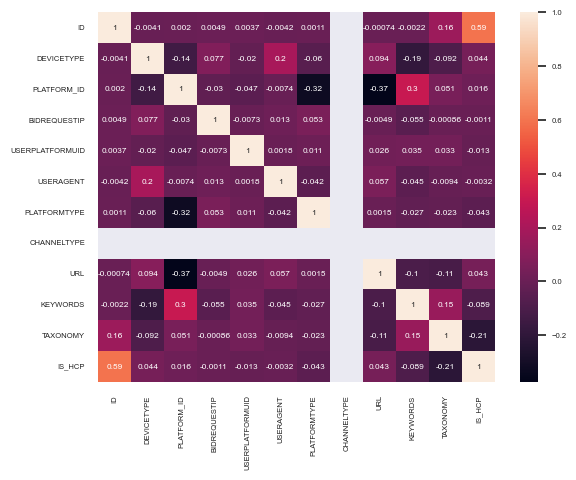

In [29]:
import seaborn as sns
corr = enc_df.corr()
ax = sns.heatmap(corr, annot=True)
sns.set(font_scale = 0.1)

In [12]:
featured_cols = ['DEVICETYPE', 'PLATFORM_ID', 'BIDREQUESTIP', 'USERPLATFORMUID', 'USERAGENT', 'PLATFORMTYPE', 'URL', 'KEYWORDS']
x = train_df[featured_cols]
y = train_df.IS_HCP
x.head()

,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERAGENT,PLATFORMTYPE,URL,KEYWORDS
0,0,1,7194,26134,3100,3,746,475
1,0,1,21236,47842,2913,3,789,112
2,0,1,21730,41220,2913,3,746,475
3,0,2,4614,17268,3191,3,394,283
4,1,6,11084,39893,4371,3,1764,267


In [13]:
test_df = enc_df[len(df1) : ]
test_df = test_df[featured_cols]
test_df

,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERAGENT,PLATFORMTYPE,URL,KEYWORDS
0,0,1,32162,3285,2706,3,941,421
1,1,1,16246,49642,4159,3,4740,465
2,0,1,7459,15080,2863,3,4778,0
3,0,6,25935,15468,2899,3,1440,546
4,0,1,30842,58517,3011,3,5164,1154
...,...,...,...,...,...,...,...,...
28488,0,1,24832,29846,2949,3,5225,1059
28489,0,6,32308,40859,3068,3,1995,2230
28490,0,6,4602,42743,2863,3,2101,2234
28491,0,7,21781,54644,2264,3,414,2471


### Model Training

In [14]:
from sklearn.ensemble import RandomForestClassifier                    
model = RandomForestClassifier(n_estimators=3, criterion="entropy") 
model.fit(x, y)

RandomForestClassifier(criterion='entropy', n_estimators=3)

In [15]:
y_pred = model.predict(test_df)
result = pd.DataFrame({'ID': df2['ID'],'Predicted': y_pred})
result

,ID,Predicted
0,115501,0
1,115502,1
2,115503,0
3,115504,0
4,115505,1
...,...,...
28488,143989,0
28489,143990,0
28490,143991,0
28491,143992,0


In [16]:
result.to_csv('is_HCP_result.csv', index = False)

In [17]:
y_pred_train = model.predict(x)
result2 = pd.DataFrame({'Actual': y, 'Predicted': y_pred_train})
result2

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
113932,1,1
113933,1,1
113934,1,1
113935,1,1


In [18]:
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y, y_pred_train))

Accuracy:  0.9978058049623915


### Multiple Model Training

In [19]:
# for i in range(1, 31, 2):               
#     model = RandomForestClassifier(n_estimators=i, criterion="entropy")
#     model.fit(x, y)
#     y_pred_train = model.predict(x)
#     print("Accuracy for ", i, "th model: ", accuracy_score(y, y_pred_train))

In [20]:
df_is_hcp = train_df.loc[train_df['IS_HCP'] == 1]
df_is_hcp

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,TAXONOMY,IS_HCP
3,3,0,2,4614,17268,3191,3,0,394,283,149,1
8,8,1,1,486,47148,4045,3,0,776,627,151,1
21,21,0,2,2842,27015,3187,3,0,393,436,143,1
29,29,0,6,16012,6131,3227,3,0,1705,950,156,1
35,35,0,1,30407,50658,2847,3,0,5318,306,56,1
...,...,...,...,...,...,...,...,...,...,...,...,...
113932,113932,0,1,24280,1271,2828,3,0,908,155,69,1
113933,113933,0,1,485,12564,3265,3,0,943,70,149,1
113934,113934,0,6,11676,38656,2891,3,0,1705,950,112,1
113935,113935,1,1,25085,43464,4159,3,0,2620,1741,149,1


In [21]:
x2 = train_df[featured_cols]
y2 = train_df.TAXONOMY
x2

,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERAGENT,PLATFORMTYPE,URL,KEYWORDS
0,0,1,7194,26134,3100,3,746,475
1,0,1,21236,47842,2913,3,789,112
2,0,1,21730,41220,2913,3,746,475
3,0,2,4614,17268,3191,3,394,283
4,1,6,11084,39893,4371,3,1764,267
...,...,...,...,...,...,...,...,...
113932,0,1,24280,1271,2828,3,908,155
113933,0,1,485,12564,3265,3,943,70
113934,0,6,11676,38656,2891,3,1705,950
113935,1,1,25085,43464,4159,3,2620,1741


In [22]:
model2 = RandomForestClassifier(n_estimators=3, criterion="entropy")
model2.fit(x2, y2)

RandomForestClassifier(criterion='entropy', n_estimators=3)

In [23]:
test_df.iloc[1]

DEVICETYPE             1
PLATFORM_ID            1
BIDREQUESTIP       16246
USERPLATFORMUID    49642
USERAGENT           4159
PLATFORMTYPE           3
URL                 4740
KEYWORDS             465
Name: 1, dtype: int64

In [24]:
# for i in range(len(y_pred)):
#     if(y_pred[i] == 1):
#         print(model2.predict([test_df.iloc[i]]))

layer2_data = test_df[y_pred == 1]
y_pred_tax = model2.predict(layer2_data)
len(y_pred_tax)

8307

In [25]:
le = preprocessing.LabelEncoder()
le.fit(df['TAXONOMY'])
decoded_labels = le.inverse_transform(y_pred_tax)
print(decoded_labels)

['2084N0400X' '2084P0800X' '2084N0400X' ... '2084P0800X' '2084N0400X'
 '207L00000X']


In [26]:
result_2 = pd.DataFrame({'ID': df2[y_pred == 1]['ID'],'Predicted': decoded_labels})
result_2

,ID,Predicted
1,115502,2084N0400X
4,115505,2084P0800X
10,115511,2084N0400X
12,115513,2084P0800X
29,115530,2084P0800X
...,...,...
28470,143971,207RG0300X
28472,143973,2084N0400X
28474,143975,2084P0800X
28476,143977,2084N0400X


In [27]:
result_2.to_csv('TAXONOMY_result.csv', index = False)